<a href="https://colab.research.google.com/github/poojitharajapuram/ML-HW4/blob/main/HW4_INTRO_TO_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [82]:
url = 'https://raw.githubusercontent.com/poojitharajapuram/ML-HW4/main/cancer.csv'
data = pd.read_csv(url)
removed_column = data.pop('diagnosis')
data.pop('Unnamed: 32')
Y = pd.DataFrame({'diagnosis': removed_column})
X = data

In [83]:

sc = StandardScaler()
X_std = sc.fit_transform(X)
Y = Y.values.ravel()
n = X.shape[1]
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []

for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='linear', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using linear kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))


K = 1
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1-Score: 0.8842105263157894
K = 2
Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1-Score: 0.9072164948453608
K = 3
Accuracy: 0.9210526315789473
Precision: 0.88
Recall: 0.9361702127659575
F1-Score: 0.9072164948453608
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1-Score: 0.9361702127659575
K = 5
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 6
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 7
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 8
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 9
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.936

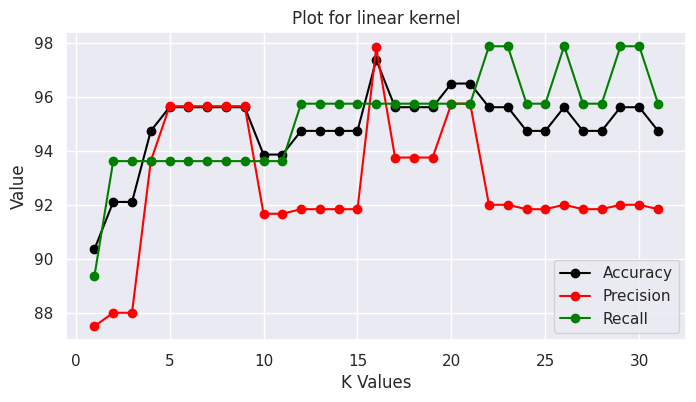

In [84]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [85]:
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []
for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='poly', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using polynomial kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))

K = 1
Accuracy: 0.8596491228070176
Precision: 1.0
Recall: 0.6595744680851063
F1-Score: 0.7948717948717948
K = 2
Accuracy: 0.9298245614035088
Precision: 0.975609756097561
Recall: 0.851063829787234
F1-Score: 0.9090909090909092
K = 3
Accuracy: 0.9298245614035088
Precision: 1.0
Recall: 0.8297872340425532
F1-Score: 0.9069767441860465
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9555555555555556
Recall: 0.9148936170212766
F1-Score: 0.9347826086956522
K = 5
Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1-Score: 0.9565217391304347
K = 6
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 7
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 8
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 9
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9574468085106383
F1-Score: 0.9782608695652174
K = 10

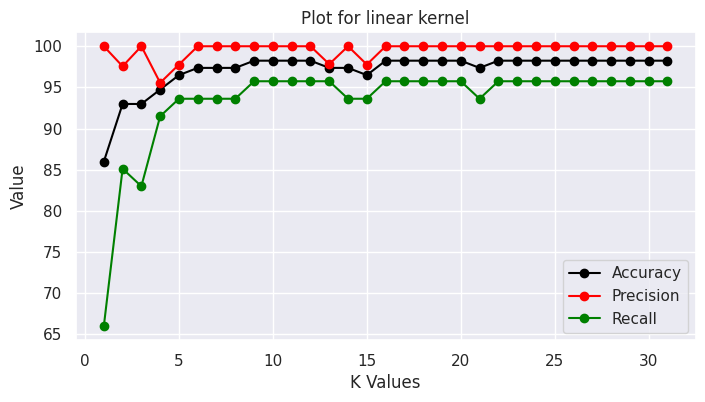

In [86]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

In [87]:
acc_list = []
recall_list = []
precision_list = []
f1score_list = []
k_list = []
for i in range(n):
    print("K = " + str(i + 1))
    pca = PCA(n_components=i + 1)
    principalComponents = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, Y, test_size=0.20, random_state=0)
    classifier = SVC(kernel='rbf', C=10)
    classifier.fit(X_train, y_train)
    Y_pred = classifier.predict(X_test)

    acc = metrics.accuracy_score(y_test, Y_pred)
    pre = metrics.precision_score(y_test, Y_pred, pos_label="M")
    rec = metrics.recall_score(y_test, Y_pred, pos_label="M")
    fscore = metrics.f1_score(y_test, Y_pred, pos_label="M")

    print("Accuracy:", acc)
    print("Precision:", pre)
    print("Recall:", rec)
    print("F1-Score:", fscore)

    acc_list.append(acc * 100.0)
    precision_list.append(pre * 100.0)
    recall_list.append(rec * 100.0)
    f1score_list.append(fscore * 100.0)
    k_list.append(i + 1)

high_acc = max(acc_list)
high_acc_k = acc_list.index(max(acc_list)) + 1
print("----------------")
print("Highest Classification Accuracy Achieved using RBF kernel: " + str(high_acc) + " for K number = " + str(high_acc_k))

K = 1
Accuracy: 0.8947368421052632
Precision: 0.8571428571428571
Recall: 0.8936170212765957
F1-Score: 0.875
K = 2
Accuracy: 0.9035087719298246
Precision: 0.86
Recall: 0.9148936170212766
F1-Score: 0.8865979381443299
K = 3
Accuracy: 0.9298245614035088
Precision: 0.9148936170212766
Recall: 0.9148936170212766
F1-Score: 0.9148936170212766
K = 4
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1-Score: 0.9361702127659575
K = 5
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1-Score: 0.9462365591397849
K = 6
Accuracy: 0.9649122807017544
Precision: 0.9777777777777777
Recall: 0.9361702127659575
F1-Score: 0.9565217391304347
K = 7
Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9361702127659575
F1-Score: 0.967032967032967
K = 8
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9574468085106383
F1-Score: 0.9782608695652174
K = 9
Accuracy: 0.9912280701754386
Precision: 1.0
Recall: 0.9787234042553191
F1-Score: 0.98

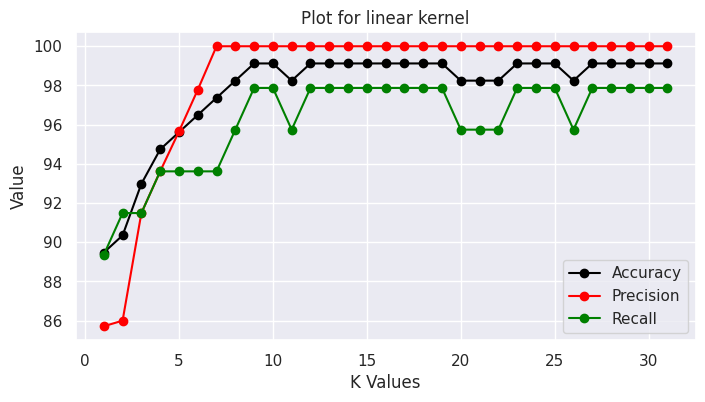

In [88]:
plt.figure(figsize=(8, 4))

# Plot Accuracy in blue
plt.plot(k_list, acc_list, marker='o', linestyle='-', color='black', label='Accuracy')

# Plot Precision in green
plt.plot(k_list, precision_list, marker='o', linestyle='-', color='red', label='Precision')

# Plot Recall in red
plt.plot(k_list, recall_list, marker='o', linestyle='-', color='green', label='Recall')

plt.title('Plot for linear kernel')
plt.xlabel('K Values')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()

Problem 2

In [55]:
url = 'https://raw.githubusercontent.com/poojitharajapuram/ML-HW4/main/Housing.csv'
H_data = pd.read_csv(url)

In [56]:
def preprocess(data,variables):
  new_data = data[variables].replace({'yes':1,'no':0})
  x = new_data.iloc[:,1:]
  m = x.shape[0]
  y = np.array(new_data.iloc[:,0],dtype=np.float128).reshape(m,1)
  x = np.array(x,dtype=np.float128)
  f_col = np.ones((m,1))
  x = np.hstack((f_col,x))
  return x,y

In [57]:
from sklearn.preprocessing import MinMaxScaler
variable = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
X,y = preprocess(H_data,variable)
sc = MinMaxScaler()
X_std = sc.fit_transform(X)

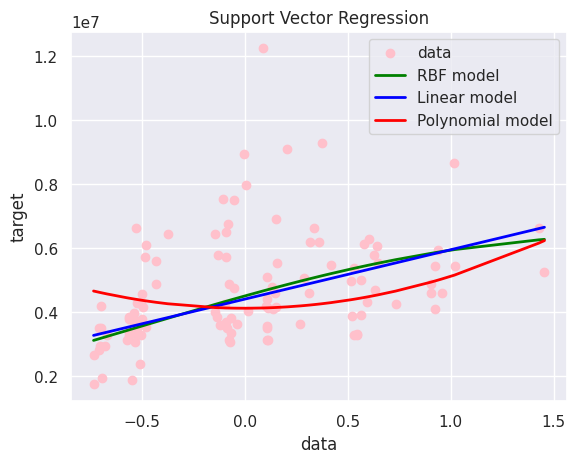

In [77]:
y_rbf = SVR(kernel='rbf', C=3e6, gamma=0.1)
y_lin = SVR(kernel='linear', C=2e5)
y_poly = SVR(kernel='poly', C=5e6, degree=2)
n_components = 1
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(X_std)
X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, y, test_size = 0.20, random_state = 0)
pred_rbf = y_rbf.fit(X_train, Y_train.ravel()).predict(X_test)
pred_lin = y_lin.fit(X_train, Y_train.ravel()).predict(X_test)
pred_poly = y_poly.fit(X_train, Y_train.ravel()).predict(X_test)
sort_order = np.argsort(X_test.ravel())
X_test = X_test[sort_order].ravel()
lw = 2
plt.scatter(X_test, Y_test[sort_order].ravel(), color='pink', label='data')
plt.plot(X_test, pred_rbf[sort_order].ravel(), color='green', lw=lw, label='RBF model')
plt.plot(X_test, pred_lin[sort_order].ravel(), color='blue', lw=lw, label='Linear model')
plt.plot(X_test, pred_poly[sort_order].ravel(), color='red', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
n=X.shape[1]
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size = 0.20, random_state = 0)
    svr_lin = SVR(kernel='linear',  C=2e5)
    y_fit = svr_lin.fit(X_train, y_train.ravel())
    y_pred = y_fit.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("")
print("Linear kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')

K=1: RMSE = 1607985.34, R2 = 0.10
K=2: RMSE = 1341873.86, R2 = 0.38
K=3: RMSE = 1360158.03, R2 = 0.36
K=4: RMSE = 1319655.91, R2 = 0.40
K=5: RMSE = 1357628.15, R2 = 0.36
K=6: RMSE = 1170199.18, R2 = 0.52
K=7: RMSE = 1143340.00, R2 = 0.55
K=8: RMSE = 1145924.56, R2 = 0.54
K=9: RMSE = 1061108.34, R2 = 0.61
K=10: RMSE = 1041682.42, R2 = 0.62
K=11: RMSE = 1009279.75, R2 = 0.65

Linear kernel
Best K value is : 11
Best RMSE (K=11): 1009279.75
Corresponding Best R2: 0.65


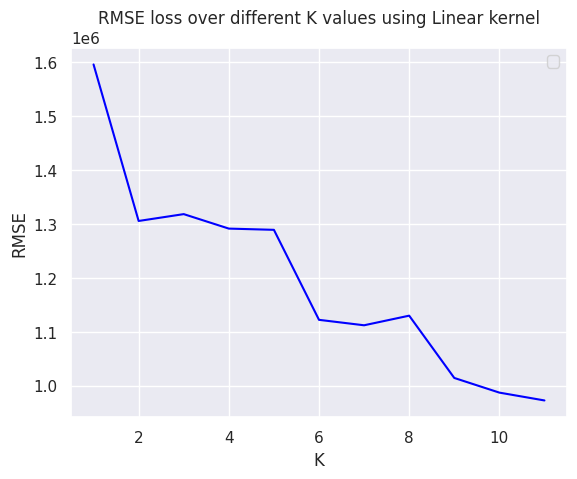

In [72]:
plt.plot(range(1,n), rmse_list, color='blue')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Linear kernel')
plt.legend()
plt.show()

K=1: RMSE = 1765331.32, R2 = -0.08
K=2: RMSE = 1400402.08, R2 = 0.32
K=3: RMSE = 1406861.09, R2 = 0.31
K=4: RMSE = 1340587.82, R2 = 0.38
K=5: RMSE = 1352282.99, R2 = 0.37
K=6: RMSE = 1320588.54, R2 = 0.39
K=7: RMSE = 1358996.45, R2 = 0.36
K=8: RMSE = 1526250.55, R2 = 0.19


K=9: RMSE = 1456280.15, R2 = 0.26
K=10: RMSE = 1442979.28, R2 = 0.28
K=11: RMSE = 1325907.49, R2 = 0.39

Polynomial kernel
Best K value is : 6
Best RMSE (K=6): 1320588.54
Corresponding Best R2: 0.39


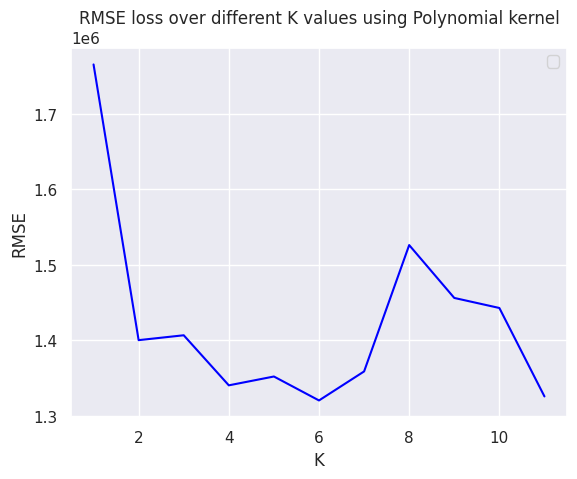

In [73]:
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size = 0.20, random_state = 0)
    svr_lin = SVR(kernel='poly', C=5e6, degree=2)
    y_fit = svr_lin.fit(X_train, y_train.ravel())
    y_pred = y_fit.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')

print("")
print("Polynomial kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')
plt.plot(range(1,n), rmse_list, color='blue')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using Polynomial kernel')
plt.legend()
plt.show()

K=1: RMSE = 1595919.61, R2 = 0.12
K=2: RMSE = 1305471.19, R2 = 0.41
K=3: RMSE = 1318173.01, R2 = 0.40
K=4: RMSE = 1291308.92, R2 = 0.42
K=5: RMSE = 1289024.80, R2 = 0.42
K=6: RMSE = 1122000.15, R2 = 0.56
K=7: RMSE = 1111893.80, R2 = 0.57
K=8: RMSE = 1129742.21, R2 = 0.56
K=9: RMSE = 1014164.73, R2 = 0.64
K=10: RMSE = 986947.09, R2 = 0.66
K=11: RMSE = 972404.91, R2 = 0.67

RBF kernel
Best K value is : 11
Best RMSE (K=11): 972404.91
Corresponding Best R2: 0.67


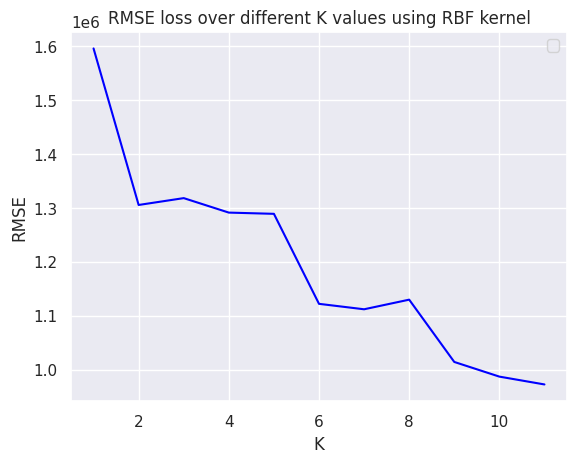

In [74]:
rmse_list = []
best_rmse = float('inf')
best_r2 = -float('inf')
best_k = None
for k in range(1,n):
    pca = PCA(n_components=k)
    principal_components = pca.fit_transform(X_std)
    X_train, X_test, y_train, y_test = train_test_split(principal_components, y, test_size = 0.20, random_state = 0)
    svr_lin = SVR(kernel='rbf', C=3e6, gamma=0.1)
    y_fit = svr_lin.fit(X_train, y_train.ravel())
    y_pred = y_fit.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_pred.ravel()))
    rmse_list.append(rmse)
    r2 = r2_score(y_test, y_pred.ravel())
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_k = k

    print(f'K={k}: RMSE = {rmse:.2f}, R2 = {r2:.2f}')
print("")
print("RBF kernel")
print("Best K value is :",best_k)
print(f'Best RMSE (K={best_k}): {best_rmse:.2f}')
print(f'Corresponding Best R2: {best_r2:.2f}')
plt.plot(range(1,n), rmse_list, color='blue')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.title('RMSE loss over different K values using RBF kernel')
plt.legend()
plt.show()